<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/MWG_Sentiment_17122021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: mwg
Nhập giới hạn comment: 1000


# **Sentiment Applied**

standardized data...
Processing step 1: Lower Case, Removed Https tag, Removed Stopwords
CPU times: user 6.9 ms, sys: 0 ns, total: 6.9 ms
Wall time: 6.92 ms
CPU times: user 32.8 ms, sys: 0 ns, total: 32.8 ms
Wall time: 32.8 ms
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 4 ms
Done
2021-12-17 10:12:08,647 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmpki5nzgpo


100%|██████████| 2234880/2234880 [00:00<00:00, 36870333.56B/s]

2021-12-17 10:12:08,997 copying /tmp/tmpki5nzgpo to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2021-12-17 10:12:09,002 removing temp file /tmp/tmpki5nzgpo


Processing step 3: Tokenize
Processing step 4: POS Tagging
Processing step 5: Entity Regconize
Processing step 6: Vectorize PhoBERT
Process model SVM....
>>> Done


# **Visualize Sentiment Analysis**

Ý nghĩa của biểu đồ: Biểu diễn số lượng bình luận tích cực / tiêu cực / trung tính theo khung thời gian.
* Positive Comment: Bình luận được máy nhận diện là tích cực
* Negative Comment: Bình luận được máy nhận diện là tiêu cực
* Neutral Comment: Bình luận được máy nhận diện là không có trạng thái cảm xúc (hoặc máy không nhận diện được)

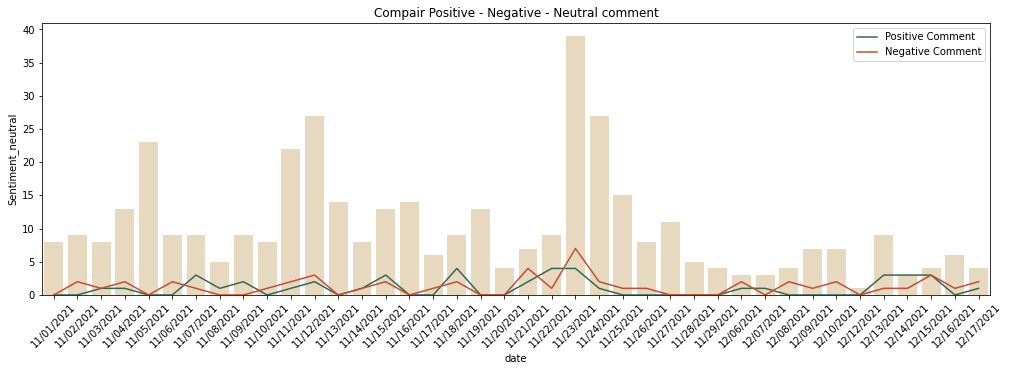

,Sentiment_negative,Sentiment_neutral,Sentiment_positive
date,,,
11/2021,36.0,356.0,30.0
12/2021,15.0,51.0,12.0


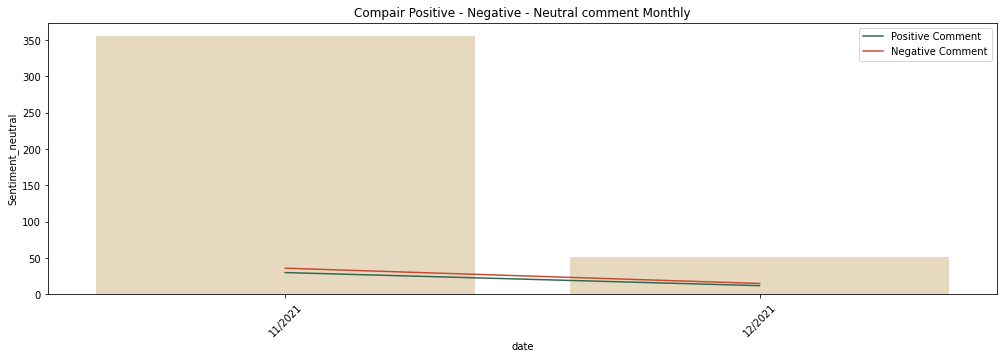

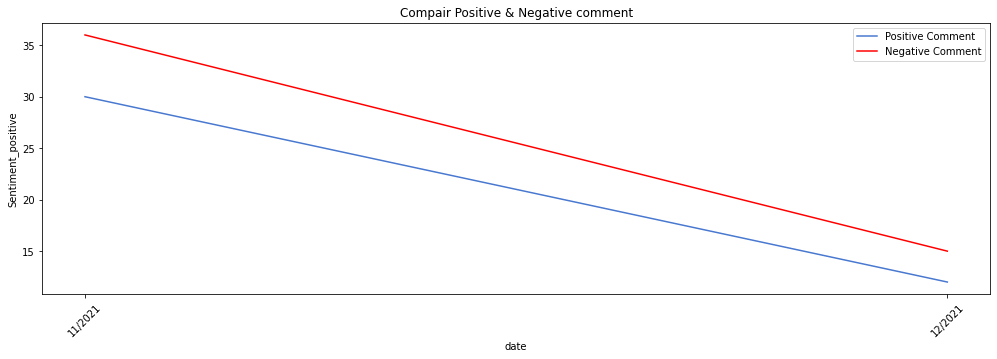

# **Visualize Topic Cluster**

Ý nghĩa biểu đồ: Phân loại comment theo 4 nhóm: Cơ bản / Kĩ thuật / Vĩ mô / Tin đồn. Và nhận diện cảm xúc (tích cực / tiêu cực) trên từng loại topic

Text(0.5, 1.0, 'Topic Tin đồn')

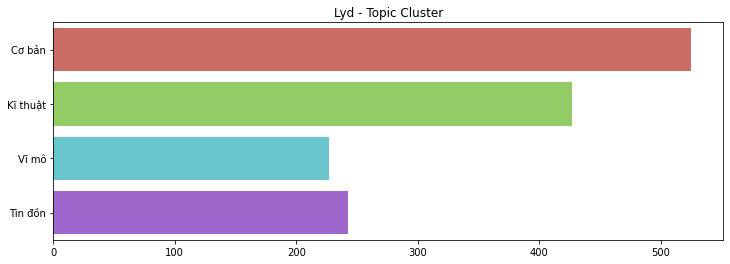

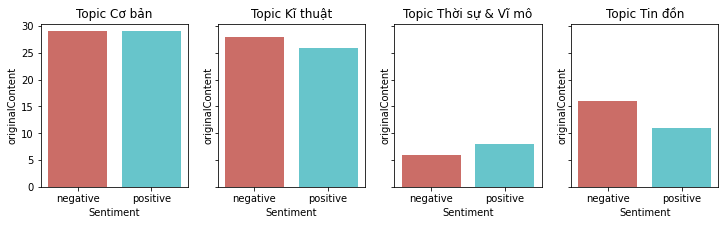

Số comment cơ bản =  525 . Số người tham gia comment =  522
Số comment kĩ thuật =  427 . Số người tham gia comment =  422
Số comment thời sự & vĩ mô =  227 . Số người tham gia comment =  225
Số comment tin đồn =  243 . Số người tham gia comment =  242


In [ ]:
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
a = tin_don['originalContent']
a = pd.DataFrame(a)
a.head(100)

,originalContent
0,"1) CTG: Khối ngoại mua ròng CTG trong 11 phiên liên tục, sở hữu trên 25% vốn VietinBank 2) REE: 3 dự án điện gió là động lực tăng trưởng lợi nhuận của REE năm 2022, kỳ vọng dự án M&E nhà ga T3 Tân Sơn Nhất và sân bay Long Thành 3) MWG: Blue Sport; Xuất hiện hình ảnh chuỗi bán đồ thể thao của Thế Giới Di Động, có đủ các thương hiệu như Nike, Adidas, Puma,... 4) MML/VSN: Anco chuyển nhượng 24,9%..."
1,"Bảng tin mỗi ngày: 30/11/2021 “Có tâm mới có tầm” CHÂN THÀNH VÀ ĐỈNH CAO Dòng tiền: Kết thúc phiên giao dịch ngày 29/11/2021, chỉ số VNINDEX giảm 0,55% đóng cửa ở mức 1.484,84 điểm. Giá trị giao dịch trên sàn HOSE đạt 31.355 tỷ đồng, giá trị giao dịch toàn thị trường tính cả 3 sàn đạt 38.596 tỷ đồng, giảm 8% so với phiên liền trước. NĐT nước ngoài BÁN ròng 539.9 tỷ đồng, tính riêng giao dịch k..."
5,"Bảng tin mỗi ngày: 29/11/2021 “Có tâm mới có tầm” CHÂN THÀNH VÀ ĐỈNH CAO Dòng tiền: Kết thúc phiên giao dịch ngày 26/11/2021, chỉ số VNINDEX giảm 0,52% đóng cửa ở mức 1,493,03 điểm. Giá trị giao dịch trên sàn HOSE đạt 35,073 tỷ đồng, giá trị giao dịch toàn thị trường tính cả 3 sàn đạt 41,966.0 tỷ đồng, Tăng 12.6% so với phiên liền trước. NĐT nước ngoài BÁN ròng 2106.6 tỷ đồng, tính riêng giao ..."
8,"Chủ nhật, 28/11/2021, 08:00 (GMT+7) Cá nhân trong nước mua ròng tuần thứ 4 liên tiếp, gom mạnh VPB và HPG Thị trường chứng khoán biến động tích cực trong tuần từ 22-26/11. Cụ thể, VN-Index đóng cửa phiên giao dịch cuối tuần ở mức 1.493,03 điểm, tương ứng tăng 40,68 điểm (2,8%) so với tuần trước đó. HNX-Index cũng tăng 4,66 điểm (1%) lên 458,63 điểm. UPCoM-Index tăng 1,1 điểm (1%) lên 114,34 đi..."
9,"BID: Dự kiến phát hành tối đa 1,03 tỷ cổ phiếu để trả cổ tức, tỷ lệ 25,7% TTF: Được chấp thuận phát hành 100 triệu cổ phiếu để chào bán riêng lẻ và hoán đổi nợ BCM: Dragon Capital khuyên thoái vốn ở một số công ty con SSI: Em trai Chủ tịch Nguyễn Duy Hưng và công ty liên quan trao tay gần 2,5 triệu cổ phiếu Nới lỏng giãn cách, nhiều doanh nghiệp công bố kết quả kinh doanh tháng 10 khả quan: MW..."
10,"pigbank đã viết: ↑ Lịch sử luôn lặp lại , tháng 10 năm 2003 , index rơi từ đỉnh hơn 570 về 130 rồi bắt đầu phục hồi, sau gần 4 năm, lên đỉnh 1170 điểm , tăng khoảng 900% , và sau đó là downtrend gần 2 năm giảm từ 1170 về 234 tạo đáy rồi cũng hồi phục đi lên tới bây giờ . HNX ra đời sau VN index , thoi 2007 cũng tăng lên hon 470 điểm , rồi rơi về hơn 50 điểm vào cuối năm 2012 , vừa rồi tăng lên..."
20,"tomriddle1234 đã viết: ↑ Lũy kế đến 26.11.2021, Top 10 MUA RÒNG của tự doanh: 1. KDH - Giá trị 816,270 tỷ - lãi 74,01% 2. MWG - Giá trị 665,319 tỷ - lãi 79,07% 3. FPT - Giá trị 475,112 tỷ - lãi 96,49% 4. CTG - Giá trị 435,376 tỷ - lãi 28,13% 5. VPB - Giá trị: 363,567 tỷ - lãi 117,09% 6. PNJ - Giá trị 344,977 tỷ - lãi 26,52% 7. VIC - Giá trị 343,765 tỷ - lãi 2,41% 8. TCB - Giá trị 338,928 tỷ- l..."
21,"tomriddle1234 đã viết: ↑ Lũy kế đến 26.11.2021, Top 10 MUA RÒNG của tự doanh: 1. KDH - Giá trị 816,270 tỷ - lãi 74,01% 2. MWG - Giá trị 665,319 tỷ - lãi 79,07% 3. FPT - Giá trị 475,112 tỷ - lãi 96,49% 4. CTG - Giá trị 435,376 tỷ - lãi 28,13% 5. VPB - Giá trị: 363,567 tỷ - lãi 117,09% 6. PNJ - Giá trị 344,977 tỷ - lãi 26,52% 7. VIC - Giá trị 343,765 tỷ - lãi 2,41% 8. TCB - Giá trị 338,928 tỷ- l..."
22,"Lũy kế đến 26.11.2021, Top 10 MUA RÒNG của tự doanh: 1. KDH - Giá trị 816,270 tỷ - lãi 74,01% 2. MWG - Giá trị 665,319 tỷ - lãi 79,07% 3. FPT - Giá trị 475,112 tỷ - lãi 96,49% 4. CTG - Giá trị 435,376 tỷ - lãi 28,13% 5. VPB - Giá trị: 363,567 tỷ - lãi 117,09% 6. PNJ - Giá trị 344,977 tỷ - lãi 26,52% 7. VIC - Giá trị 343,765 tỷ - lãi 2,41% 8. TCB - Giá trị 338,928 tỷ- lãi 71,43% 9. VHM - Giá tr..."
28,"phamkhachoivps đã viết: ↑ Bảng tin mỗi ngày: 25/11/2021 “Có tâm mới có tầm” CHÂN THÀNH VÀ ĐỈNH CAO Dòng tiền: Kết thúc phiên giao dịch ngày 24/11/2021, chỉ số VNINDEX tăng 1.72% đóng cửa ở mức 1,488 điểm. Giá trị giao dịch trên sàn HOSE đạt 35.674 tỷ đồng, giá trị giao dịch toàn thị trường tính cả 3 sàn đạt 42.190 tỷ đồng, tăng 33% so vớ